<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/12324_normal_cup_vs_large_cup_VGG16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np

In [2]:
os.listdir('/content/drive/MyDrive/optic cup images/split')

['train', 'val', 'test']

In [3]:
os.listdir('/content/drive/MyDrive/optic cup images/split/train')

['normal cup', 'large cup']

In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

train_images = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/train',
                                           target_size=(224, 224))

validation_images = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/val',
                                                target_size=(224, 224))

test_images = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/test',
                                          target_size=(224, 224))


Found 70 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [5]:
import keras
VGG = keras.applications.VGG16(include_top=False,
                               input_shape=(224,224,3),
                               weights="imagenet")
VGG.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
from keras.models import Sequential

model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(2, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
model.fit(train_images,
          batch_size=10,
          epochs=5,
          validation_data=validation_images)

model.save('ODcup_model.keras')

Epoch 1/5
3/3 [==============================] - 46s 13s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 10.8309 - val_accuracy: 0.7500
Epoch 2/5
3/3 [==============================] - 45s 20s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 10.0956 - val_accuracy: 0.7500
Epoch 3/5
3/3 [==============================] - 54s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.5514 - val_accuracy: 0.7500
Epoch 4/5
3/3 [==============================] - 50s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.1415 - val_accuracy: 0.7500
Epoch 5/5
3/3 [==============================] - 45s 13s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.8344 - val_accuracy: 0.7500


In [34]:
y_pred = model.predict(test_images)
y_pred

1/1 [==============================] - 5s 5s/step


array([[9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 1.6537574e-26],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 2.1770101e-18],
       [9.9999994e-01, 2.1554726e-28],
       [9.9999994e-01, 0.0000000e+00],
       [1.9713352e-37, 9.9999994e-01],
       [0.0000000e+00, 9.9999994e-01],
       [1.0000000e+00, 3.4434839e-09],
       [1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [35]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [36]:
y_true = test_images.classes
y_true

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [37]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[5, 0],
       [3, 2]])

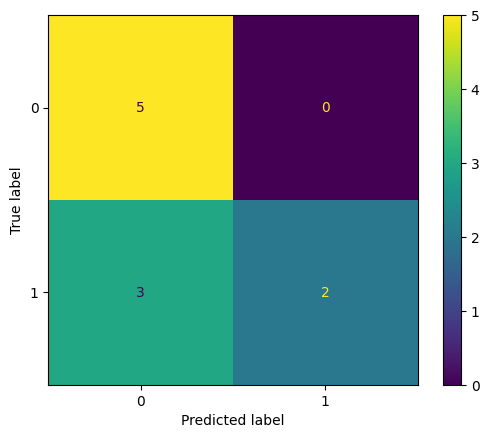

In [38]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

In [39]:
test_images.class_indices

{'large cup': 0, 'normal cup': 1}

In [40]:
print(metrics.classification_report(y_true, y_pred1))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.40      0.57         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



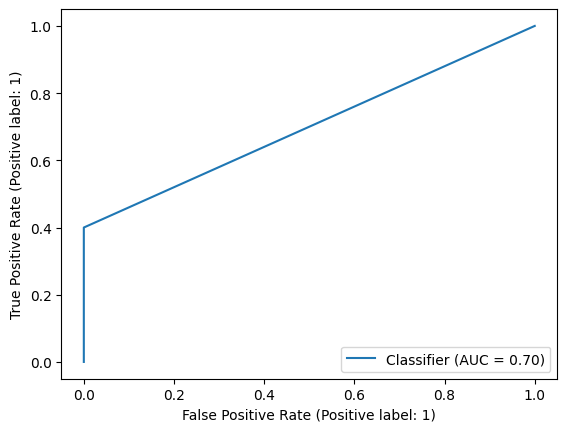

In [41]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred1)

1/1 [==============================] - 0s 467ms/step
Prediction: large cup


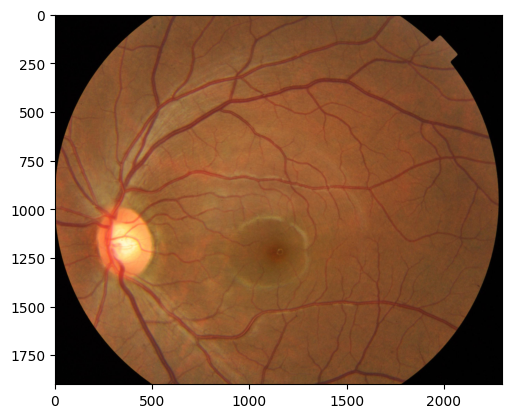

In [42]:
from keras.models import load_model
from keras.preprocessing import image

odcupmodel = load_model('ODcup_model.keras')

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(224,224))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["large cup", "normal cup"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/optic cup images/large cup/1ffa9498-8d87-11e8-9daf-6045cb817f5b..JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/optic cup images/large cup/1ffa9498-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)



In [28]:
test_images.class_indices

{'large cup': 0, 'normal cup': 1}

1/1 [==============================] - 1s 773ms/step
Prediction: normal cup


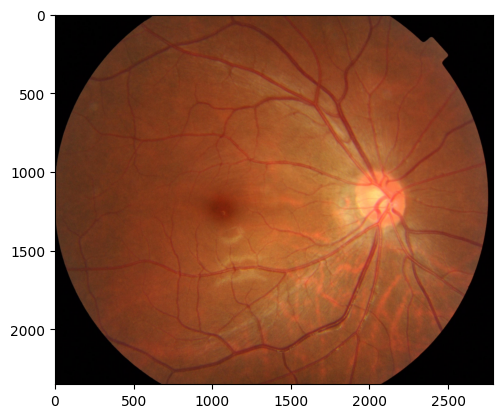

In [43]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/optic cup images/normal cup/1ffa962d-8d87-11e8-9daf-6045cb817f5b..JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/optic cup images/normal cup/1ffa962d-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)

